In [1]:
import numpy as np
from numpy.linalg import eig

In [2]:
class CustomPCA:

    def __init__(self, num_components: int = 2):
        self.num_components = num_components
        self.components: np.ndarray = None
        self.explained_variance: np.ndarray = None
        self.explained_variance_ratio: np.ndarray = None
        self.inertia: float = None
        self.mean =  None
        self.n_samples: int = None
        self.n_features: int = None
        self.cov: np.ndarray = None
        

    def fit(self, data: np.ndarray):

        self.n_sample, self.n_feature = data.shape
        self.mean = np.mean(a= data, axis=0)

        centered_data = data - self.mean
        self.cov = np.cov(centered_data.T)

        values, vectors = eig(self.cov)

        sorted_index = np.argsort(values)[::-1]
        values = values[sorted_index] # sort eigen values
        vectors = vectors[:, sorted_index] # reorder eigen vectors
        
        self.explained_variance = values[:self.num_components]
        self.eigen_values = values
        sum_ = np.sum(a=values, axis=0)
        self.explained_variance_ratio = 100 * self.explained_variance/sum_ 
        self.inertia = np.sum(a=self.explained_variance_ratio, axis=0)
        self.components = vectors[:self.num_components]
        

    def transform(self, data: np.ndarray):
        
        centered_data = data - self.mean

        return np.dot(centered_data, self.components.T)

    def fit_transform(self, data: np.ndarray):
        self.fit(data= data)
        return self.fit_transform(data)


In [3]:
X = np.random.normal(loc = 0, scale = 1, size = (1000, 30))



In [4]:

cust_pca = CustomPCA(num_components = 23)

# fit PCA on old data
cust_pca.fit(X)

# check explained variance
print(f"Explained variance: {cust_pca.inertia:.4f}")

Explained variance: 81.9219


In [5]:
cust_pca.explained_variance

array([1.33336952, 1.29973933, 1.24525958, 1.21686894, 1.19375688,
       1.17546528, 1.15923842, 1.14794893, 1.12370003, 1.10682888,
       1.0778696 , 1.05237692, 1.03294087, 1.00869075, 0.99776989,
       0.98089229, 0.95594715, 0.93058895, 0.92322187, 0.91833518,
       0.89342911, 0.86173244, 0.84948038])

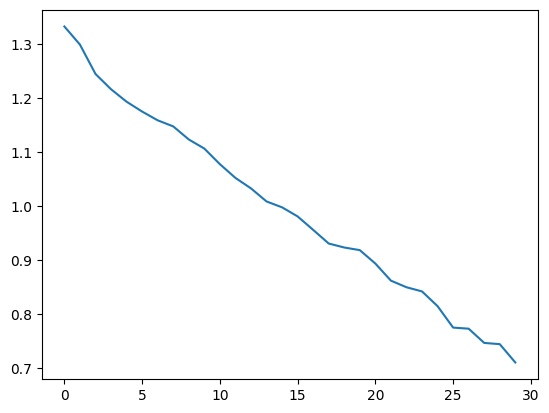

In [6]:
import matplotlib.pyplot as plt

plt.plot(cust_pca.eigen_values)
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=23)

pca.fit(X)

PCA(n_components=23)

In [8]:
pca.explained_variance_

array([1.33336952, 1.29973933, 1.24525958, 1.21686894, 1.19375688,
       1.17546528, 1.15923842, 1.14794893, 1.12370003, 1.10682888,
       1.0778696 , 1.05237692, 1.03294087, 1.00869075, 0.99776989,
       0.98089229, 0.95594715, 0.93058895, 0.92322187, 0.91833518,
       0.89342911, 0.86173244, 0.84948038])